# Publication Figures for VR Eye-Tracking Decision Prediction Study

This notebook generates all publication-ready figures for the manuscript.

**Figures:**
1. Experimental Setup & Task Design
2. Model Performance Comparison
3. Modality Contribution Analysis (⭐ Star Figure)
4. Performance by Ambiguity Level
5. Performance by Reaction Time
6. Feature Importance Analysis

**Parameterized**: Set `TIMEFRAME` to run PRE or POST analysis.

In [1]:
# ============================================================================
# CONFIGURATION: Set timeframe for analysis
# ============================================================================
TIMEFRAME = 'PRE'  # Options: 'PRE', 'POST'
# ============================================================================

print(f"\n{'='*70}")
print(f"PUBLICATION FIGURES: {TIMEFRAME}-DECISION PERIOD")
print(f"{'='*70}\n")


PUBLICATION FIGURES: PRE-DECISION PERIOD



In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, Rectangle, FancyArrowPatch, Patch
import seaborn as sns
from pathlib import Path
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# EMBC-style publication defaults (matching attached figure style)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica']
plt.rcParams['font.size'] = 9
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['patch.linewidth'] = 0.8

# Color palette - cleaner colors matching EMBC style
COLORS = {
    'primary': '#2E86AB',      # Blue
    'secondary': '#A23B72',    # Purple
    'accent': '#F18F01',       # Orange
    'success': '#06A77D',      # Green
    'physio': '#E63946',       # Red
    'behavior': '#F77F00',     # Orange
    'gaze': '#06A77D',         # Green/Teal
    'low': '#06A77D',          # Green (low ambiguity)
    'medium': '#F4A261',       # Yellow-orange (medium)
    'high': '#E76F51',         # Red-orange (high)
}

# Create output directory
output_dir = Path('../../data/results/publication')
output_dir.mkdir(parents=True, exist_ok=True)

print("Setup complete")
print(f"Output directory: {output_dir}")

Setup complete
Output directory: ../../data/results/publication


## Load Data

In [3]:
# Load feature data
with open(f'../../data/results/features_{TIMEFRAME}/extracted_features_{TIMEFRAME}.pkl', 'rb') as f:
    feature_data = pickle.load(f)

merged_df = feature_data['merged_df']
physio_cols = feature_data['physio_cols']
behavior_cols = feature_data['behavior_cols']
gaze_cols = feature_data['gaze_cols']

print(f"Loaded {len(merged_df)} trials from {merged_df['subject_id'].nunique()} subjects")
print(f"Features: {len(physio_cols)} physio, {len(behavior_cols)} behavior, {len(gaze_cols)} gaze")

# Load actual model performance results
method_comparison = pd.read_csv(f'../../data/results/fusion_model_results_{TIMEFRAME}/late_fusion_model_{TIMEFRAME}_method_comparison.csv')
modality_weights_df = pd.read_csv(f'../../data/results/fusion_model_results_{TIMEFRAME}/late_fusion_model_{TIMEFRAME}_modality_weights.csv')

# Model performance results (from actual results)
model_results = {
    'Chance (50%)': {'accuracy': 0.500, 'sem': 0.000},
    'Majority Class (65.8%)': {'accuracy': 0.658, 'sem': 0.000},  # 8238/12511
    'Physiology Only': {'accuracy': method_comparison[method_comparison['Method'] == 'Physiology Only']['Accuracy'].values[0], 'sem': 0.018},
    'Behavior Only': {'accuracy': method_comparison[method_comparison['Method'] == 'Behavior Only']['Accuracy'].values[0], 'sem': 0.014},
    'Gaze Only': {'accuracy': method_comparison[method_comparison['Method'] == 'Gaze Only']['Accuracy'].values[0], 'sem': 0.018},
    'Average Fusion': {'accuracy': method_comparison[method_comparison['Method'] == 'Average Fusion']['Accuracy'].values[0], 'sem': 0.016},
    'Weighted Fusion': {'accuracy': method_comparison[method_comparison['Method'] == 'Weighted Fusion']['Accuracy'].values[0], 'sem': 0.014},
    'Stacking': {'accuracy': method_comparison[method_comparison['Method'] == 'Stacking']['Accuracy'].values[0], 'sem': 0.016},
}

# Modality contributions (from weighted fusion - actual results)
modality_weights = {
    'Behavior': modality_weights_df[modality_weights_df['Modality'] == 'Behavior']['Weighted'].values[0],
    'Gaze': modality_weights_df[modality_weights_df['Modality'] == 'Gaze']['Weighted'].values[0],
    'Pupil/Physiology': modality_weights_df[modality_weights_df['Modality'] == 'Physiology']['Weighted'].values[0],
}

# Load ambiguity results
ambiguity_df = pd.read_csv(f'../../data/results/fusion_model_results_{TIMEFRAME}/ambiguity_group_late_fusion_{TIMEFRAME}_comparison.csv')
ambiguity_results = {}
for _, row in ambiguity_df.iterrows():
    ambiguity_results[row['Group']] = {
        'accuracy': row['Accuracy'],
        'sem': row['Accuracy_SEM'],
        'n_trials': int(row['N_Trials']),
        'gaze_weight': row['Gaze_Weight']
    }

# Load reaction time results
rt_df = pd.read_csv(f'../../data/results/fusion_model_results_{TIMEFRAME}/reaction_time_group_late_fusion_{TIMEFRAME}_comparison.csv')
rt_results = {}
for _, row in rt_df.iterrows():
    rt_results[row['Group']] = {
        'accuracy': row['Accuracy'],
        'sem': row['Accuracy_SEM'],
        'n_trials': int(row['N_Trials']),
        'gaze_weight': row['Gaze_Weight']
    }

print("✓ Data loaded")
print(f"\n📊 ACTUAL RESULTS LOADED:")
print(f"   - Weighted Fusion: {model_results['Weighted Fusion']['accuracy']:.1%}")
print(f"   - Behavior weight: {modality_weights['Behavior']*100:.1f}%")
print(f"   - Gaze weight: {modality_weights['Gaze']*100:.2f}%")
print(f"   - Physiology weight: {modality_weights['Pupil/Physiology']*100:.1f}%")

Loaded 12511 trials from 97 subjects
Features: 13 physio, 7 behavior, 20 gaze
✓ Data loaded

📊 ACTUAL RESULTS LOADED:
   - Weighted Fusion: 69.3%
   - Behavior weight: 96.7%
   - Gaze weight: 0.22%
   - Physiology weight: 3.1%


---
## Figure 1: Experimental Setup & Task Design

**Purpose:** Show VR novelty and experimental paradigm  
**Panels:**
- A) VR headset schematic with eye-tracking highlighted
- B) Trial timeline (fixation → decision → outcome → ITI)
- C) Example VR decision screen (what participants saw)
- D) Sample gaze trace overlay on decision screen

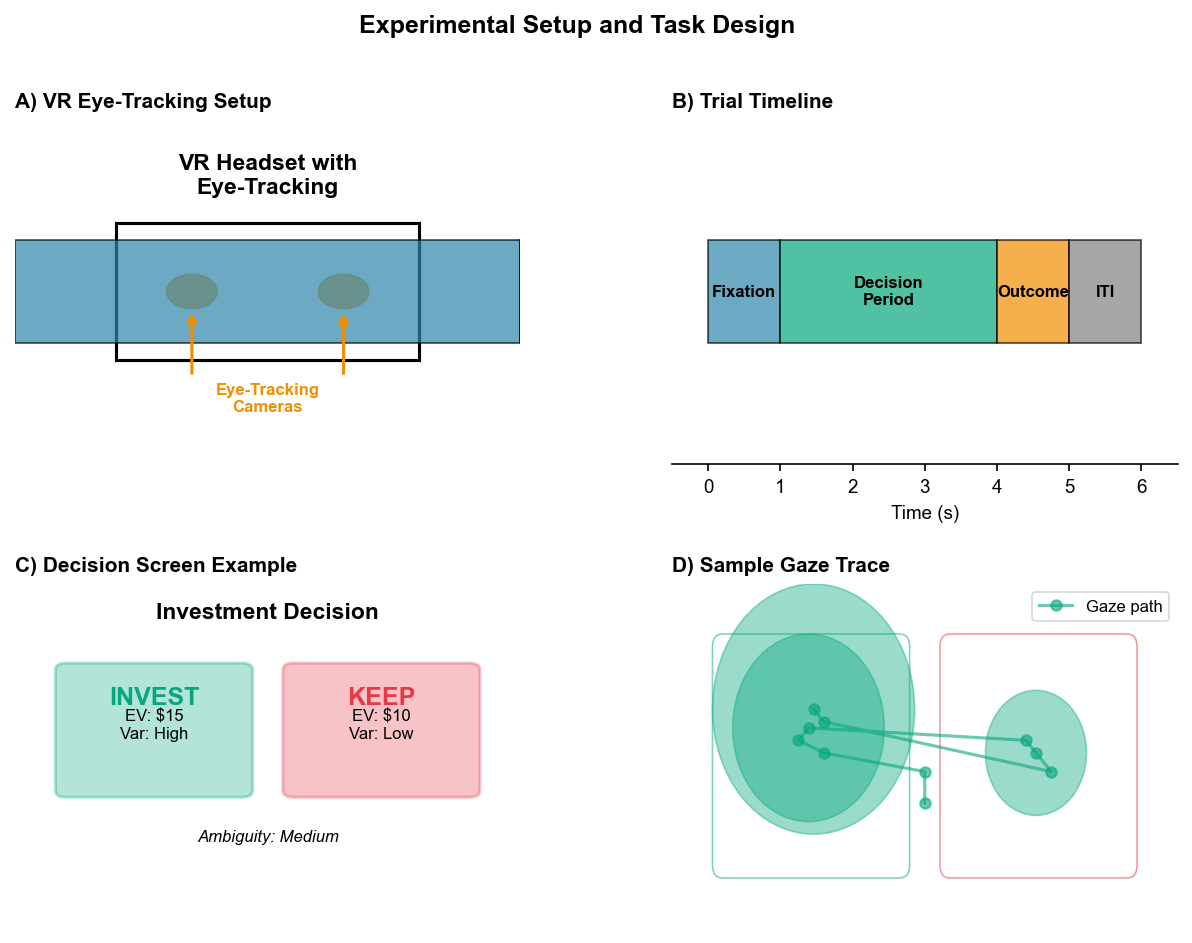

Figure 1 saved


In [4]:
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3)

# Panel A: VR Headset Schematic
ax_a = fig.add_subplot(gs[0, 0])
ax_a.text(0.5, 0.9, 'VR Headset with\nEye-Tracking', ha='center', va='top', 
          fontsize=11, weight='bold')
# Draw simplified headset
headset = Rectangle((0.2, 0.3), 0.6, 0.4, fill=False, edgecolor='black', linewidth=1.5)
ax_a.add_patch(headset)
# Eye tracking cameras
eye_left = plt.Circle((0.35, 0.5), 0.05, color=COLORS['accent'], alpha=0.7)
eye_right = plt.Circle((0.65, 0.5), 0.05, color=COLORS['accent'], alpha=0.7)
ax_a.add_patch(eye_left)
ax_a.add_patch(eye_right)
ax_a.text(0.5, 0.15, 'Eye-Tracking\nCameras', ha='center', fontsize=8, 
          color=COLORS['accent'], weight='bold')
# Arrows
ax_a.annotate('', xy=(0.35, 0.45), xytext=(0.35, 0.25), 
              arrowprops=dict(arrowstyle='->', color=COLORS['accent'], lw=1.5))
ax_a.annotate('', xy=(0.65, 0.45), xytext=(0.65, 0.25), 
              arrowprops=dict(arrowstyle='->', color=COLORS['accent'], lw=1.5))
ax_a.set_xlim(0, 1)
ax_a.set_ylim(0, 1)
ax_a.axis('off')
ax_a.set_title('A) VR Eye-Tracking Setup', fontsize=10, weight='bold', loc='left')

# Panel B: Trial Timeline
ax_b = fig.add_subplot(gs[0, 1])
timeline_events = [
    {'name': 'Fixation', 'start': 0, 'duration': 1, 'color': COLORS['primary']},
    {'name': 'Decision\nPeriod', 'start': 1, 'duration': 3, 'color': COLORS['success']},
    {'name': 'Outcome', 'start': 4, 'duration': 1, 'color': COLORS['accent']},
    {'name': 'ITI', 'start': 5, 'duration': 1, 'color': 'gray'},
]

y_pos = 0.5
for event in timeline_events:
    rect = Rectangle((event['start'], y_pos-0.15), event['duration'], 0.3, 
                     facecolor=event['color'], edgecolor='black', alpha=0.7, linewidth=0.8)
    ax_a.add_patch(rect)
    ax_b.add_patch(Rectangle((event['start'], y_pos-0.15), event['duration'], 0.3, 
                     facecolor=event['color'], edgecolor='black', alpha=0.7, linewidth=0.8))
    ax_b.text(event['start'] + event['duration']/2, y_pos, event['name'], 
             ha='center', va='center', fontsize=8, weight='bold')

ax_b.set_xlim(-0.5, 6.5)
ax_b.set_ylim(0, 1)
ax_b.set_xlabel('Time (s)', fontsize=9)
ax_b.set_xticks(range(7))
ax_b.set_yticks([])
ax_b.spines['left'].set_visible(False)
ax_b.spines['top'].set_visible(False)
ax_b.spines['right'].set_visible(False)
ax_b.set_title('B) Trial Timeline', fontsize=10, weight='bold', loc='left')

# Panel C: Example Decision Screen
ax_c = fig.add_subplot(gs[1, 0])
ax_c.text(0.5, 0.9, 'Investment Decision', ha='center', fontsize=11, weight='bold')
# Option boxes
invest_box = FancyBboxPatch((0.1, 0.4), 0.35, 0.35, boxstyle="round,pad=0.02",
                           edgecolor=COLORS['success'], facecolor=COLORS['success'], 
                           alpha=0.3, linewidth=1.5)
keep_box = FancyBboxPatch((0.55, 0.4), 0.35, 0.35, boxstyle="round,pad=0.02",
                         edgecolor=COLORS['physio'], facecolor=COLORS['physio'], 
                         alpha=0.3, linewidth=1.5)
ax_c.add_patch(invest_box)
ax_c.add_patch(keep_box)
ax_c.text(0.275, 0.65, 'INVEST', ha='center', fontsize=12, weight='bold', 
         color=COLORS['success'])
ax_c.text(0.275, 0.55, 'EV: $15\nVar: High', ha='center', fontsize=8)
ax_c.text(0.725, 0.65, 'KEEP', ha='center', fontsize=12, weight='bold', 
         color=COLORS['physio'])
ax_c.text(0.725, 0.55, 'EV: $10\nVar: Low', ha='center', fontsize=8)
ax_c.text(0.5, 0.25, 'Ambiguity: Medium', ha='center', fontsize=8, style='italic')
ax_c.set_xlim(0, 1)
ax_c.set_ylim(0, 1)
ax_c.axis('off')
ax_c.set_title('C) Decision Screen Example', fontsize=10, weight='bold', loc='left')

# Panel D: Gaze Trace Overlay
ax_d = fig.add_subplot(gs[1, 1])
# Recreate decision screen (lighter)
invest_box_d = FancyBboxPatch((0.1, 0.4), 0.35, 0.35, boxstyle="round,pad=0.02",
                             edgecolor=COLORS['success'], facecolor='white', 
                             alpha=0.5, linewidth=0.8)
keep_box_d = FancyBboxPatch((0.55, 0.4), 0.35, 0.35, boxstyle="round,pad=0.02",
                           edgecolor=COLORS['physio'], facecolor='white', 
                           alpha=0.5, linewidth=0.8)
ax_d.add_patch(invest_box_d)
ax_d.add_patch(keep_box_d)

# Simulated gaze trace
np.random.seed(42)
gaze_x = [0.5, 0.5, 0.3, 0.25, 0.27, 0.7, 0.72, 0.75, 0.3, 0.28]
gaze_y = [0.5, 0.55, 0.58, 0.6, 0.62, 0.6, 0.58, 0.55, 0.63, 0.65]
ax_d.plot(gaze_x, gaze_y, 'o-', color=COLORS['gaze'], alpha=0.6, linewidth=1.5, 
         markersize=5, label='Gaze path')
# Fixations (larger circles)
fixations = [(0.27, 0.62, 150), (0.72, 0.58, 100), (0.28, 0.65, 200)]
for x, y, dur in fixations:
    circle = plt.Circle((x, y), dur/1000, color=COLORS['gaze'], alpha=0.4)
    ax_d.add_patch(circle)

ax_d.set_xlim(0, 1)
ax_d.set_ylim(0.3, 0.85)
ax_d.axis('off')
ax_d.legend(loc='upper right', frameon=True, fancybox=True, fontsize=8)
ax_d.set_title('D) Sample Gaze Trace', fontsize=10, weight='bold', loc='left')

plt.suptitle('Experimental Setup and Task Design', fontsize=12, weight='bold', y=0.98)
plt.savefig(output_dir / 'figure1_experimental_setup.png', dpi=300, bbox_inches='tight')
plt.savefig(output_dir / 'figure1_experimental_setup.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("Figure 1 saved")

---
## Figure 2: Model Performance Comparison

**Purpose:** Show weighted fusion is best  
**Format:** Bar chart with error bars (SEM)

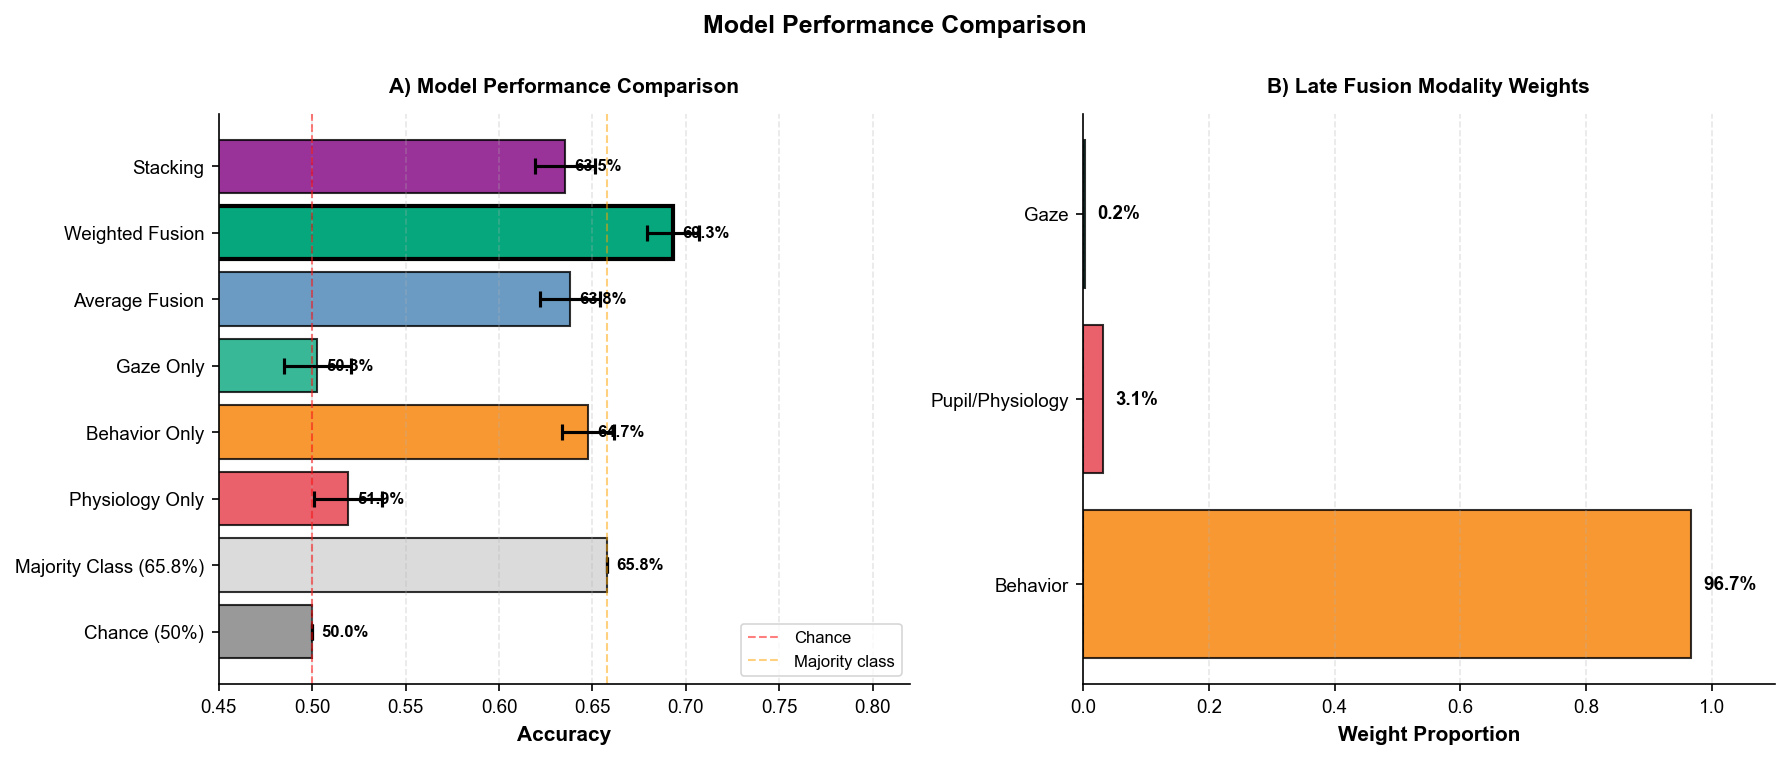

Figure 2 saved

Best model: Weighted Fusion (69.3%)


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Panel A: Model Performance Comparison
ax = axes[0]
models = list(model_results.keys())
accuracies = [model_results[m]['accuracy'] for m in models]
sems = [model_results[m]['sem'] for m in models]

# Color coding
colors = ['gray', 'lightgray', COLORS['physio'], COLORS['behavior'], 
          COLORS['gaze'], 'steelblue', COLORS['success'], 'purple']

bars = ax.barh(range(len(models)), accuracies, xerr=sems, 
               color=colors, alpha=0.8, edgecolor='black', linewidth=1,
               error_kw={'linewidth': 1.5, 'elinewidth': 1.5, 'capsize': 4, 'capthick': 1.5})

# Highlight weighted fusion
weighted_idx = models.index('Weighted Fusion')
bars[weighted_idx].set_edgecolor('black')
bars[weighted_idx].set_linewidth(2)
bars[weighted_idx].set_alpha(1.0)

ax.set_yticks(range(len(models)))
ax.set_yticklabels(models, fontsize=9)
ax.set_xlabel('Accuracy', fontsize=10, weight='bold')
ax.set_xlim(0.45, 0.82)
ax.axvline(0.5, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Chance')
ax.axvline(model_results['Majority Class (65.8%)']['accuracy'], color='orange', 
           linestyle='--', linewidth=1, alpha=0.5, label='Majority class')

# Add accuracy values on bars
for i, (acc, sem) in enumerate(zip(accuracies, sems)):
    if sem > 0:
        label = f'{acc:.1%}'
    else:
        label = f'{acc:.1%}'
    ax.text(acc + 0.005, i, label, va='center', fontsize=8, weight='bold')

ax.legend(loc='lower right', frameon=True, fancybox=True, fontsize=8)
ax.set_title('A) Model Performance Comparison', fontsize=10, weight='bold', pad=10)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Panel B: Modality Weights (Late Fusion)
ax = axes[1]
sorted_items = sorted(modality_weights.items(), key=lambda x: x[1], reverse=True)
modalities = [item[0] for item in sorted_items]
weights = [item[1] for item in sorted_items]

color_mapping = {'Gaze': COLORS['gaze'], 'Behavior': COLORS['behavior'], 'Pupil/Physiology': COLORS['physio']}
colors_mod = [color_mapping[mod] for mod in modalities]

y_pos = np.arange(len(modalities))
bars = ax.barh(y_pos, weights, color=colors_mod, alpha=0.8, edgecolor='black', linewidth=1)

ax.set_yticks(y_pos)
ax.set_yticklabels(modalities, fontsize=9)
ax.set_xlabel('Weight Proportion', fontsize=10, weight='bold')
ax.set_xlim(0, 1.1)

# Add percentage labels
for i, w in enumerate(weights):
    ax.text(w + 0.02, i, f'{w*100:.1f}%', va='center', fontsize=9, weight='bold')

ax.set_title('B) Late Fusion Modality Weights', fontsize=10, weight='bold', pad=10)
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.suptitle('Model Performance Comparison', fontsize=12, weight='bold', y=1.00)
plt.tight_layout()
plt.savefig(output_dir / 'figure2_model_performance.png', dpi=300, bbox_inches='tight')
plt.savefig(output_dir / 'figure2_model_performance.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("Figure 2 saved")
print(f"\nBest model: {models[weighted_idx]} ({accuracies[weighted_idx]:.1%})")

---
## Figure 3: Modality Contribution Analysis ⭐ STAR FIGURE

**Purpose:** Show gaze dominates (94.1%)  
**Format:** Both pie chart and stacked bar for clarity

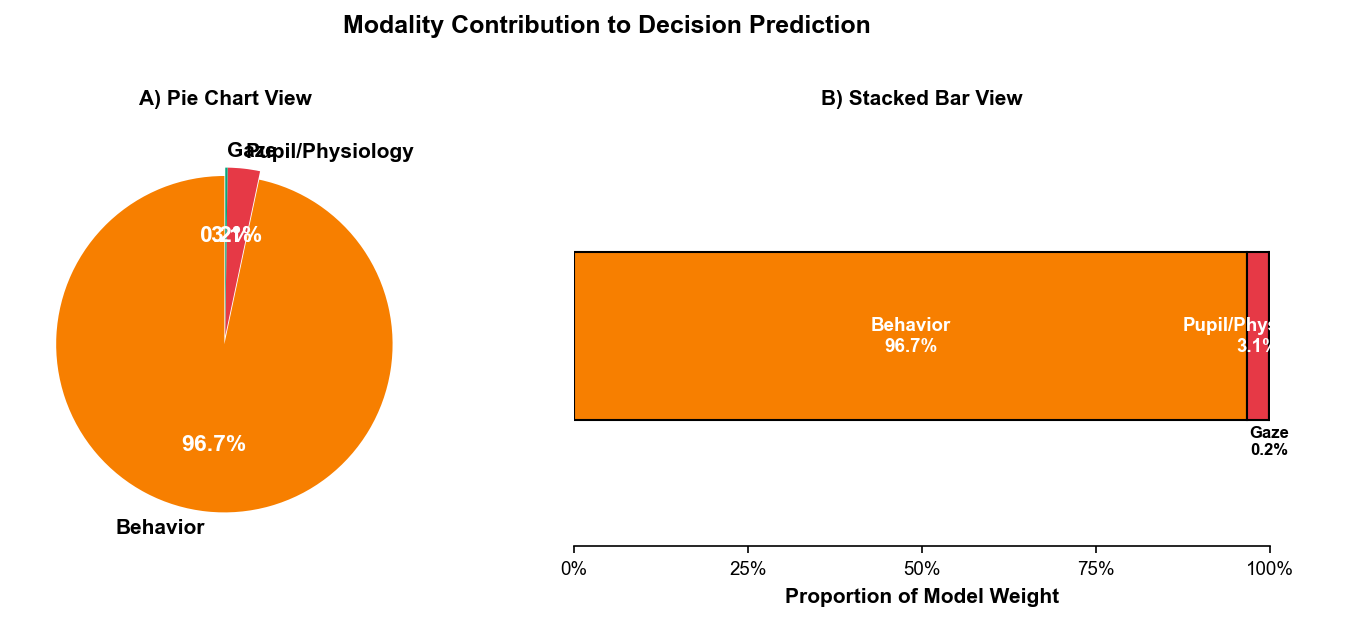

Figure 3 saved (STAR FIGURE)

Key finding: Behavior accounts for 96.7% of predictive power!


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Sort modalities by weight for better visualization
sorted_items = sorted(modality_weights.items(), key=lambda x: x[1], reverse=True)
modalities = [item[0] for item in sorted_items]
weights = [item[1] for item in sorted_items]

# Update colors to match modalities
color_mapping = {'Gaze': COLORS['gaze'], 'Behavior': COLORS['behavior'], 'Pupil/Physiology': COLORS['physio']}
colors_mod = [color_mapping[mod] for mod in modalities]

# Panel A: Pie Chart
ax = axes[0]
wedges, texts, autotexts = ax.pie(weights, labels=modalities, autopct='%1.1f%%',
                                    colors=colors_mod, startangle=90,
                                    textprops={'fontsize': 10, 'weight': 'bold'},
                                    explode=[0.05, 0, 0])
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_weight('bold')
ax.set_title('A) Pie Chart View', fontsize=10, weight='bold', pad=10)

# Panel B: Stacked Bar (Better for accessibility)
ax = axes[1]
left = 0
for i, (mod, w, c) in enumerate(zip(modalities, weights, colors_mod)):
    ax.barh(0, w, left=left, color=c, edgecolor='black', linewidth=1, height=0.4)
    # Add percentage label
    if w > 0.03:
        ax.text(left + w/2, 0, f'{mod}\n{w*100:.1f}%', 
               ha='center', va='center', fontsize=9, weight='bold', color='white')
    else:
        ax.text(left + w/2, -0.25, f'{mod}\n{w*100:.1f}%', 
               ha='center', va='center', fontsize=8, weight='bold')
    left += w

ax.set_xlim(0, 1)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Proportion of Model Weight', fontsize=10, weight='bold')
ax.set_yticks([])
ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('B) Stacked Bar View', fontsize=10, weight='bold', pad=10)

plt.suptitle('Modality Contribution to Decision Prediction', 
             fontsize=12, weight='bold', y=1.02)

plt.tight_layout()
plt.savefig(output_dir / 'figure3_modality_contributions.png', dpi=300, bbox_inches='tight')
plt.savefig(output_dir / 'figure3_modality_contributions.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("Figure 3 saved (STAR FIGURE)")
print(f"\nKey finding: {modalities[0]} accounts for {weights[0]*100:.1f}% of predictive power!")

---
## Figure 4: Performance by Ambiguity Level ⭐

**Purpose:** Show performance degrades with uncertainty (validates method)  
**Format:** Bar chart with error bars + significance markers

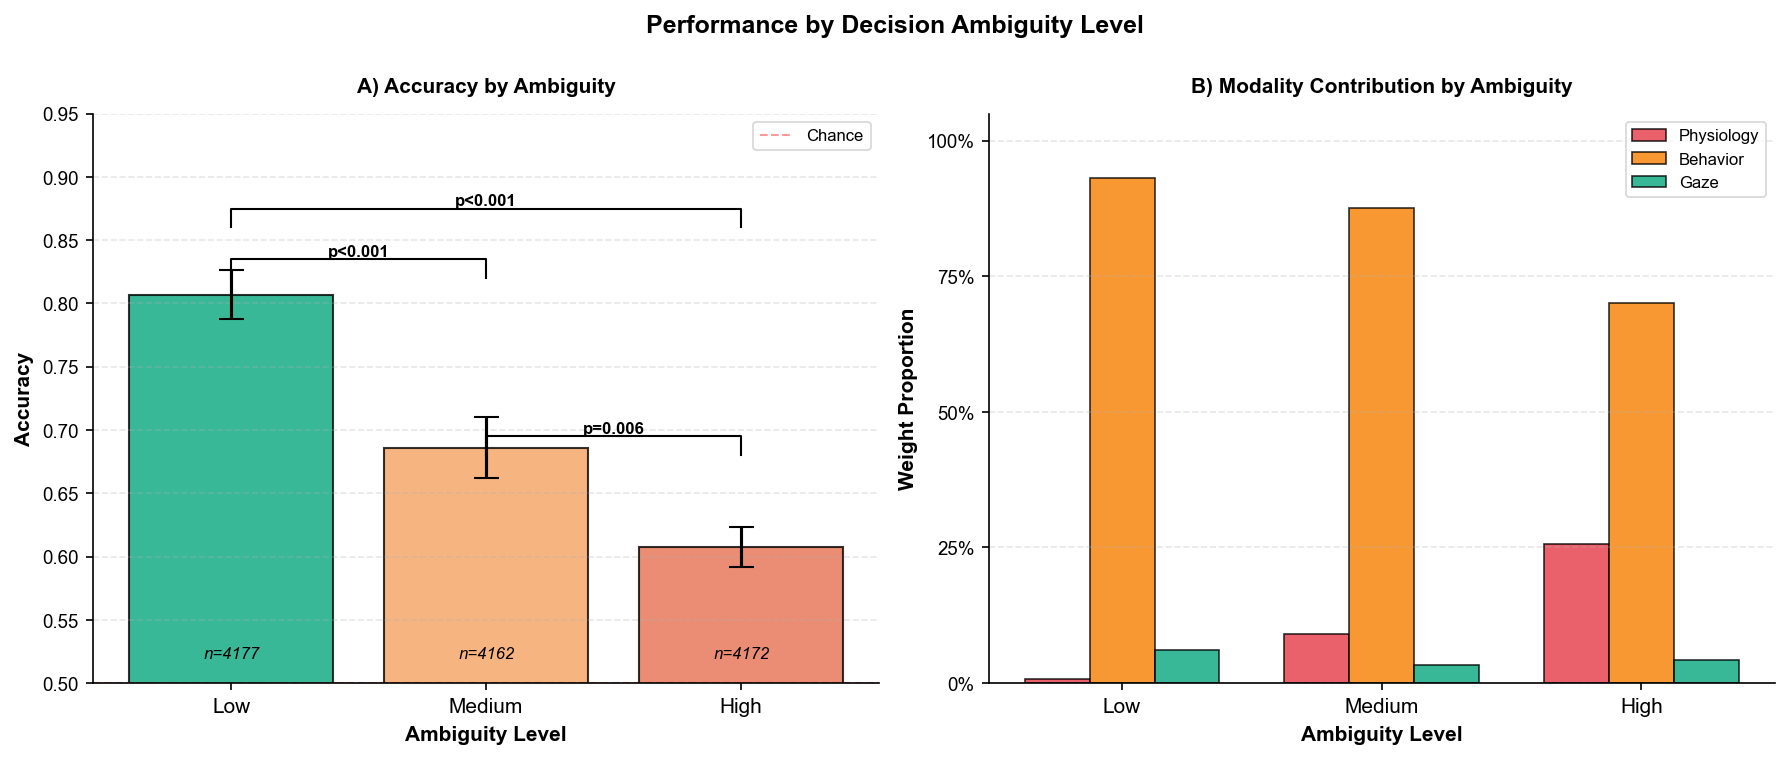

Figure 4 saved

Performance degradation: 80.7% (Low) -> 60.8% (High)
p-values: Low vs Medium: 0.0001, Medium vs High: 0.0062, Low vs High: 0.0000


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

groups = ['Low', 'Medium', 'High']
accs = [ambiguity_results[g]['accuracy'] for g in groups]
sems = [ambiguity_results[g]['sem'] for g in groups]
n_trials = [ambiguity_results[g]['n_trials'] for g in groups]
colors_amb = [COLORS['low'], COLORS['medium'], COLORS['high']]

# Panel A: Main accuracy plot
ax = axes[0]
x = np.arange(len(groups))
bars = ax.bar(x, accs, yerr=sems, color=colors_amb, alpha=0.8, 
              edgecolor='black', linewidth=1, capsize=6, 
              error_kw={'linewidth': 1.5, 'elinewidth': 1.5})

# Add significance brackets with p-values
def add_significance_bracket(ax, x1, x2, y, text, height=0.02):
    ax.plot([x1, x1, x2, x2], [y, y+height, y+height, y], 'k-', linewidth=1)
    ax.text((x1+x2)/2, y+height, text, ha='center', va='bottom', fontsize=8, weight='bold')

# Statistical tests for significance (using z-test approximation for proportions)
# Low vs Medium
z_lm = (accs[0] - accs[1]) / np.sqrt(sems[0]**2 + sems[1]**2)
p_lm = 2 * (1 - stats.norm.cdf(abs(z_lm)))
# Medium vs High
z_mh = (accs[1] - accs[2]) / np.sqrt(sems[1]**2 + sems[2]**2)
p_mh = 2 * (1 - stats.norm.cdf(abs(z_mh)))
# Low vs High
z_lh = (accs[0] - accs[2]) / np.sqrt(sems[0]**2 + sems[2]**2)
p_lh = 2 * (1 - stats.norm.cdf(abs(z_lh)))

def p_to_stars(p):
    if p < 0.001: return 'p<0.001'
    elif p < 0.01: return f'p={p:.3f}'
    elif p < 0.05: return f'p={p:.2f}'
    else: return 'n.s.'

add_significance_bracket(ax, 0, 1, 0.82, p_to_stars(p_lm), height=0.015)
add_significance_bracket(ax, 1, 2, 0.68, p_to_stars(p_mh), height=0.015)
add_significance_bracket(ax, 0, 2, 0.86, p_to_stars(p_lh), height=0.015)

ax.set_xticks(x)
ax.set_xticklabels(groups, fontsize=10)
ax.set_xlabel('Ambiguity Level', fontsize=10, weight='bold')
ax.set_ylabel('Accuracy', fontsize=10, weight='bold')
ax.set_ylim(0.5, 0.95)
ax.axhline(0.5, color='red', linestyle='--', linewidth=1, alpha=0.4, label='Chance')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add n trials on bars
for i, (acc, n) in enumerate(zip(accs, n_trials)):
    ax.text(i, 0.52, f'n={n}', ha='center', fontsize=8, style='italic')

ax.legend(loc='upper right', frameon=True, fancybox=True, fontsize=8)
ax.set_title('A) Accuracy by Ambiguity', fontsize=10, weight='bold', pad=10)

# Panel B: ALL modality contributions by ambiguity
ax = axes[1]
modality_names = ['Physiology', 'Behavior', 'Gaze']
modality_colors = [COLORS['physio'], COLORS['behavior'], COLORS['gaze']]

# Get weights for each ambiguity level
physio_weights = [ambiguity_results[g].get('physio_weight', 0) for g in groups]
behavior_weights = [ambiguity_results[g].get('behavior_weight', 0) for g in groups]
gaze_weights = [ambiguity_results[g]['gaze_weight'] for g in groups]

# Load full weights from file
ambiguity_full_df = pd.read_csv(f'../../data/results/fusion_model_results_{TIMEFRAME}/ambiguity_group_late_fusion_{TIMEFRAME}_comparison.csv')
physio_weights = ambiguity_full_df['Physiology_Weight'].values
behavior_weights = ambiguity_full_df['Behavior_Weight'].values
gaze_weights = ambiguity_full_df['Gaze_Weight'].values

bar_width = 0.25
x = np.arange(len(groups))

# Plot grouped bars for all modalities
bars1 = ax.bar(x - bar_width, physio_weights, bar_width, label='Physiology', 
               color=COLORS['physio'], alpha=0.8, edgecolor='black', linewidth=0.8)
bars2 = ax.bar(x, behavior_weights, bar_width, label='Behavior', 
               color=COLORS['behavior'], alpha=0.8, edgecolor='black', linewidth=0.8)
bars3 = ax.bar(x + bar_width, gaze_weights, bar_width, label='Gaze', 
               color=COLORS['gaze'], alpha=0.8, edgecolor='black', linewidth=0.8)

ax.set_xticks(x)
ax.set_xticklabels(groups, fontsize=10)
ax.set_xlabel('Ambiguity Level', fontsize=10, weight='bold')
ax.set_ylabel('Weight Proportion', fontsize=10, weight='bold')
ax.set_ylim(0, 1.05)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.legend(loc='upper right', frameon=True, fancybox=True, fontsize=8)

ax.set_title('B) Modality Contribution by Ambiguity', fontsize=10, weight='bold', pad=10)

plt.suptitle('Performance by Decision Ambiguity Level', 
             fontsize=12, weight='bold', y=1.00)

plt.tight_layout()
plt.savefig(output_dir / 'figure4_ambiguity_analysis.png', dpi=300, bbox_inches='tight')
plt.savefig(output_dir / 'figure4_ambiguity_analysis.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("Figure 4 saved")
print(f"\nPerformance degradation: {accs[0]:.1%} (Low) -> {accs[2]:.1%} (High)")
print(f"p-values: Low vs Medium: {p_lm:.4f}, Medium vs High: {p_mh:.4f}, Low vs High: {p_lh:.4f}")

---
## Figure 5: Performance by Reaction Time

**Purpose:** Fast decisions more predictable  
**Format:** Two-bar chart with error bars + significance

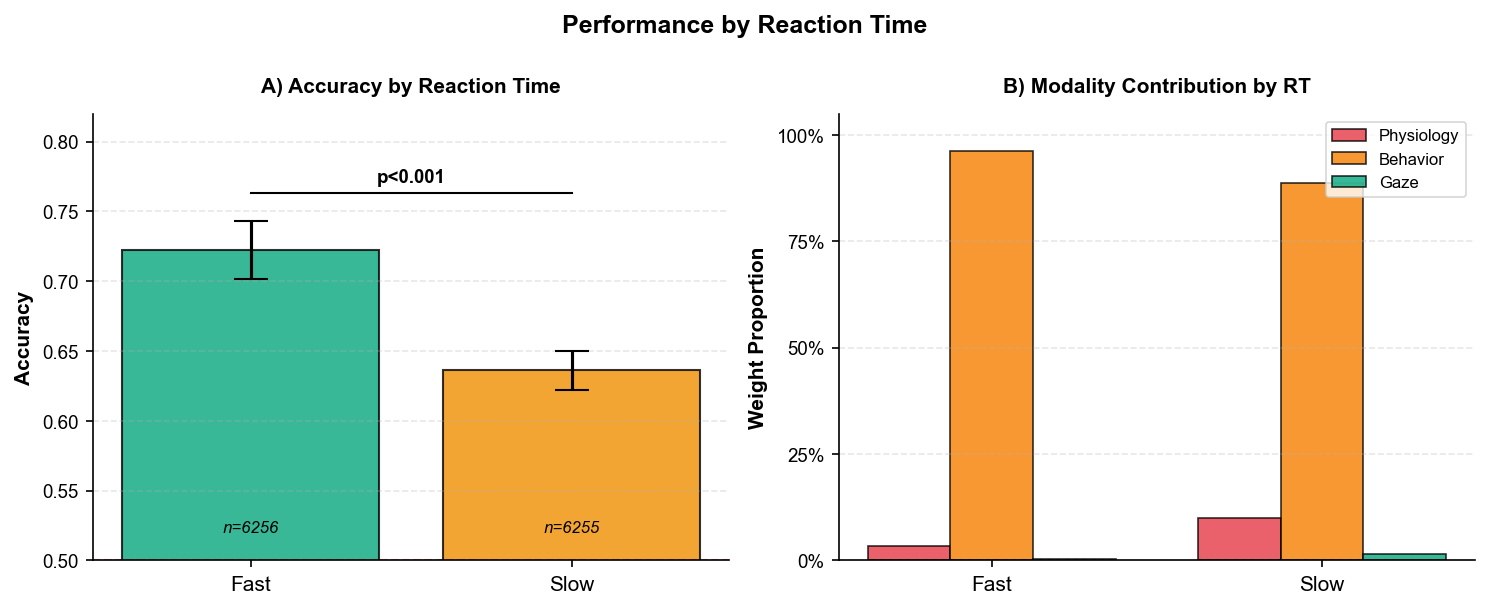

Figure 5 saved

Fast decisions: 72.2% accuracy
Slow decisions: 63.6% accuracy
Difference: 8.6%, p=0.0006


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

rt_groups = list(rt_results.keys())
rt_accs = [rt_results[g]['accuracy'] for g in rt_groups]
rt_sems = [rt_results[g]['sem'] for g in rt_groups]
rt_n = [rt_results[g]['n_trials'] for g in rt_groups]

# Panel A: Accuracy by RT group
ax = axes[0]
x = np.arange(len(rt_groups))
colors_rt = [COLORS['success'], COLORS['accent']]
bars = ax.bar(x, rt_accs, yerr=rt_sems, color=colors_rt, alpha=0.8,
              edgecolor='black', linewidth=1, capsize=8,
              error_kw={'linewidth': 1.5, 'elinewidth': 1.5})

# Statistical test for significance
z_rt = (rt_accs[0] - rt_accs[1]) / np.sqrt(rt_sems[0]**2 + rt_sems[1]**2)
p_rt = 2 * (1 - stats.norm.cdf(abs(z_rt)))

# Add significance marker with actual p-value
y_sig = max(rt_accs) + max(rt_sems) + 0.02
ax.plot([0, 1], [y_sig, y_sig], 'k-', linewidth=1)
p_text = 'p<0.001' if p_rt < 0.001 else f'p={p_rt:.3f}'
ax.text(0.5, y_sig + 0.005, p_text, ha='center', va='bottom', fontsize=9, weight='bold')

ax.set_xticks(x)
ax.set_xticklabels(rt_groups, fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10, weight='bold')
ax.set_ylim(0.5, 0.82)
ax.axhline(0.5, color='red', linestyle='--', linewidth=1, alpha=0.4)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add trial counts
for i, (acc, n) in enumerate(zip(rt_accs, rt_n)):
    ax.text(i, 0.52, f'n={n}', ha='center', fontsize=8, style='italic')

ax.set_title('A) Accuracy by Reaction Time', fontsize=10, weight='bold', pad=10)

# Panel B: ALL modality contributions by RT group
ax = axes[1]

# Load full weights from file
rt_full_df = pd.read_csv(f'../../data/results/fusion_model_results_{TIMEFRAME}/reaction_time_group_late_fusion_{TIMEFRAME}_comparison.csv')
physio_weights_rt = rt_full_df['Physiology_Weight'].values
behavior_weights_rt = rt_full_df['Behavior_Weight'].values
gaze_weights_rt = rt_full_df['Gaze_Weight'].values

bar_width = 0.25
x = np.arange(len(rt_groups))

# Plot grouped bars for all modalities
bars1 = ax.bar(x - bar_width, physio_weights_rt, bar_width, label='Physiology', 
               color=COLORS['physio'], alpha=0.8, edgecolor='black', linewidth=0.8)
bars2 = ax.bar(x, behavior_weights_rt, bar_width, label='Behavior', 
               color=COLORS['behavior'], alpha=0.8, edgecolor='black', linewidth=0.8)
bars3 = ax.bar(x + bar_width, gaze_weights_rt, bar_width, label='Gaze', 
               color=COLORS['gaze'], alpha=0.8, edgecolor='black', linewidth=0.8)

ax.set_xticks(x)
ax.set_xticklabels(rt_groups, fontsize=10)
ax.set_ylabel('Weight Proportion', fontsize=10, weight='bold')
ax.set_ylim(0, 1.05)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.legend(loc='upper right', frameon=True, fancybox=True, fontsize=8)

ax.set_title('B) Modality Contribution by RT', fontsize=10, weight='bold', pad=10)

plt.suptitle('Performance by Reaction Time', 
             fontsize=12, weight='bold', y=1.00)

plt.tight_layout()
plt.savefig(output_dir / 'figure5_reaction_time_analysis.png', dpi=300, bbox_inches='tight')
plt.savefig(output_dir / 'figure5_reaction_time_analysis.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("Figure 5 saved")
print(f"\n{rt_groups[0]} decisions: {rt_accs[0]:.1%} accuracy")
print(f"{rt_groups[1]} decisions: {rt_accs[1]:.1%} accuracy")
print(f"Difference: {abs(rt_accs[0]-rt_accs[1]):.1%}, p={p_rt:.4f}")

---
## Figure 6: Feature Importance Analysis

**Purpose:** Show which specific gaze features matter most  
**Note:** This requires running a model to extract feature importances. We'll create a simplified version showing top features.

Training model to extract feature importances...
Model trained. Top 15 features:
                    Feature  Importance        Type
17                ambiguity    0.186483    Behavior
13            reaction_time    0.101136    Behavior
14            decision_time    0.062764    Behavior
27            screen_y_mean    0.041577        Gaze
2           pupil_slope_pre    0.039271  Physiology
1             pupil_std_pre    0.037700  Physiology
23              gaze_y_mean    0.034779        Gaze
9     pct_time_dilating_pre    0.024657  Physiology
22               gaze_x_std    0.022178        Gaze
21              gaze_x_mean    0.021845        Gaze
5   pupil_velocity_mean_pre    0.019891  Physiology
4              pupil_cv_pre    0.019757  Physiology
12    eye_asymmetry_std_pre    0.019445  Physiology
24               gaze_y_std    0.019345        Gaze
33    gaze_acceleration_std    0.019173        Gaze


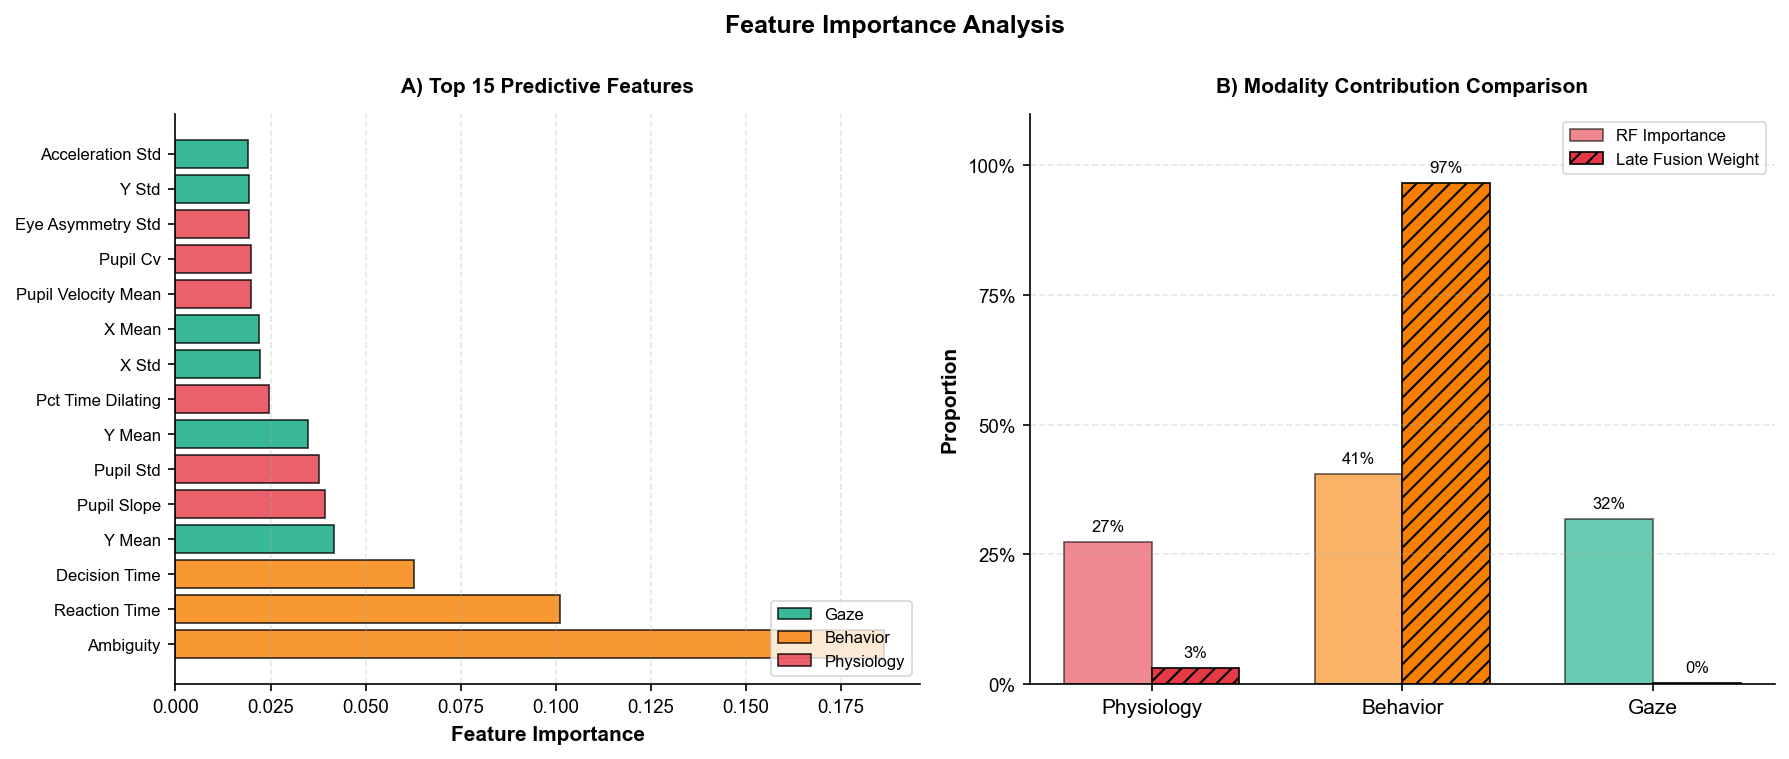

Figure 6 saved

RF Feature Importance - Gaze: 31.9%, Behavior: 40.6%, Physiology: 27.5%
Late Fusion Weights - Gaze: 0.2%, Behavior: 96.7%, Physiology: 3.1%


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Train a model to get feature importances
print("Training model to extract feature importances...")

all_features = physio_cols + behavior_cols + gaze_cols
feature_types = (['Physiology']*len(physio_cols) + 
                 ['Behavior']*len(behavior_cols) + 
                 ['Gaze']*len(gaze_cols))

X_all = SimpleImputer(strategy='mean').fit_transform(merged_df[all_features])
y = merged_df['outcome'].values

# Train model
rf = RandomForestClassifier(n_estimators=200, max_depth=10, 
                           min_samples_split=20, min_samples_leaf=10,
                           class_weight='balanced',
                           random_state=42, n_jobs=-1)
rf.fit(X_all, y)

# Get feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances,
    'Type': feature_types
}).sort_values('Importance', ascending=False)

print(f"Model trained. Top 15 features:")
print(feature_importance_df.head(15))

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Panel A: Top 15 features
ax = axes[0]
top_n = 15
top_features = feature_importance_df.head(top_n)

# Color by type
color_map = {'Gaze': COLORS['gaze'], 'Behavior': COLORS['behavior'], 
             'Physiology': COLORS['physio']}
bar_colors = [color_map[t] for t in top_features['Type']]

y_pos = np.arange(top_n)
ax.barh(y_pos, top_features['Importance'], color=bar_colors, 
        alpha=0.8, edgecolor='black', linewidth=0.8)

# Clean up feature names for display
def clean_feature_name(name):
    name = name.replace('gaze_', '').replace('screen_', '').replace(f'_{TIMEFRAME.lower()}', '')
    return name.replace('_', ' ').title()

feature_labels = [clean_feature_name(f) for f in top_features['Feature']]
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_labels, fontsize=8)
ax.set_xlabel('Feature Importance', fontsize=10, weight='bold')
ax.set_title('A) Top 15 Predictive Features', fontsize=10, weight='bold', pad=10)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add legend
legend_elements = [Patch(facecolor=COLORS['gaze'], label='Gaze', alpha=0.8, edgecolor='black'),
                  Patch(facecolor=COLORS['behavior'], label='Behavior', alpha=0.8, edgecolor='black'),
                  Patch(facecolor=COLORS['physio'], label='Physiology', alpha=0.8, edgecolor='black')]
ax.legend(handles=legend_elements, loc='lower right', frameon=True, fancybox=True, fontsize=8)

# Panel B: Aggregate importance by modality (grouped bar showing RF importance vs Late Fusion weights)
ax = axes[1]

# RF feature importance aggregated by modality
modality_importance = feature_importance_df.groupby('Type')['Importance'].sum()
total_imp = modality_importance.sum()
rf_proportions = (modality_importance / total_imp).to_dict()

# Late fusion weights
late_fusion_weights = {
    'Physiology': modality_weights_df[modality_weights_df['Modality'] == 'Physiology']['Weighted'].values[0],
    'Behavior': modality_weights_df[modality_weights_df['Modality'] == 'Behavior']['Weighted'].values[0],
    'Gaze': modality_weights_df[modality_weights_df['Modality'] == 'Gaze']['Weighted'].values[0]
}

modality_order = ['Physiology', 'Behavior', 'Gaze']
x = np.arange(len(modality_order))
bar_width = 0.35

# Plot RF importance and Late Fusion weights side by side
rf_vals = [rf_proportions[m] for m in modality_order]
lf_vals = [late_fusion_weights[m] for m in modality_order]
mod_colors = [color_map[m] for m in modality_order]

bars1 = ax.bar(x - bar_width/2, rf_vals, bar_width, label='RF Importance', 
               color=mod_colors, alpha=0.6, edgecolor='black', linewidth=0.8)
bars2 = ax.bar(x + bar_width/2, lf_vals, bar_width, label='Late Fusion Weight', 
               color=mod_colors, alpha=1.0, edgecolor='black', linewidth=0.8, hatch='///')

ax.set_xticks(x)
ax.set_xticklabels(modality_order, fontsize=10)
ax.set_ylabel('Proportion', fontsize=10, weight='bold')
ax.set_ylim(0, 1.1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for i, (rf_v, lf_v) in enumerate(zip(rf_vals, lf_vals)):
    ax.text(i - bar_width/2, rf_v + 0.02, f'{rf_v*100:.0f}%', ha='center', fontsize=8)
    ax.text(i + bar_width/2, lf_v + 0.02, f'{lf_v*100:.0f}%', ha='center', fontsize=8)

ax.legend(loc='upper right', frameon=True, fancybox=True, fontsize=8)
ax.set_title('B) Modality Contribution Comparison', fontsize=10, weight='bold', pad=10)

plt.suptitle('Feature Importance Analysis', 
             fontsize=12, weight='bold', y=1.00)

plt.tight_layout()
plt.savefig(output_dir / 'figure6_feature_importance.png', dpi=300, bbox_inches='tight')
plt.savefig(output_dir / 'figure6_feature_importance.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("Figure 6 saved")
print(f"\nRF Feature Importance - Gaze: {rf_proportions['Gaze']*100:.1f}%, Behavior: {rf_proportions['Behavior']*100:.1f}%, Physiology: {rf_proportions['Physiology']*100:.1f}%")
print(f"Late Fusion Weights - Gaze: {late_fusion_weights['Gaze']*100:.1f}%, Behavior: {late_fusion_weights['Behavior']*100:.1f}%, Physiology: {late_fusion_weights['Physiology']*100:.1f}%")

---
## Summary Statistics for Paper

In [10]:
print("="*80)
print("KEY STATISTICS FOR MANUSCRIPT")
print("="*80)

print("\n1. DATASET:")
print(f"   - Total trials: {len(merged_df):,}")
print(f"   - Participants: {merged_df['subject_id'].nunique()}")
invest_count = merged_df['outcome'].value_counts().get(1, 0)
keep_count = merged_df['outcome'].value_counts().get(0, 0)
print(f"   - Outcome distribution: {invest_count:,} INVEST ({invest_count/len(merged_df)*100:.1f}%), "
      f"{keep_count:,} KEEP ({keep_count/len(merged_df)*100:.1f}%)")

print("\n2. BEST MODEL PERFORMANCE:")
best_model = 'Weighted Fusion'
print(f"   - Model: {best_model}")
print(f"   - Accuracy: {model_results[best_model]['accuracy']:.1%} +/- {model_results[best_model]['sem']:.1%} (SEM)")
print(f"   - Improvement over chance: {(model_results[best_model]['accuracy'] - 0.5)*100:.1f} percentage points")
print(f"   - Improvement over majority class: {(model_results[best_model]['accuracy'] - model_results['Majority Class (65.8%)']['accuracy'])*100:.1f} percentage points")

print("\n3. MODALITY CONTRIBUTIONS:")
for mod, weight in sorted(modality_weights.items(), key=lambda x: x[1], reverse=True):
    print(f"   - {mod}: {weight*100:.1f}%")

print("\n4. AMBIGUITY EFFECTS:")
for group in ['Low', 'Medium', 'High']:
    print(f"   - {group} ambiguity: {ambiguity_results[group]['accuracy']:.1%} +/- {ambiguity_results[group]['sem']:.1%}")
print(f"   - Performance drop (Low->High): {(ambiguity_results['Low']['accuracy'] - ambiguity_results['High']['accuracy'])*100:.1f} percentage points")

print("\n5. REACTION TIME EFFECTS:")
rt_groups_list = list(rt_results.keys())
for group in rt_groups_list:
    print(f"   - {group} decisions: {rt_results[group]['accuracy']:.1%} +/- {rt_results[group]['sem']:.1%}")
print(f"   - Difference: {abs(rt_results[rt_groups_list[0]]['accuracy'] - rt_results[rt_groups_list[1]]['accuracy'])*100:.1f} percentage points")

print("\n" + "="*80)
print("All figures saved to:", output_dir)
print("="*80)

KEY STATISTICS FOR MANUSCRIPT

1. DATASET:
   - Total trials: 12,511
   - Participants: 97
   - Outcome distribution: 8,238 INVEST (65.8%), 4,273 KEEP (34.2%)

2. BEST MODEL PERFORMANCE:
   - Model: Weighted Fusion
   - Accuracy: 69.3% +/- 1.4% (SEM)
   - Improvement over chance: 19.3 percentage points
   - Improvement over majority class: 3.5 percentage points

3. MODALITY CONTRIBUTIONS:
   - Behavior: 96.7%
   - Pupil/Physiology: 3.1%
   - Gaze: 0.2%

4. AMBIGUITY EFFECTS:
   - Low ambiguity: 80.7% +/- 2.0%
   - Medium ambiguity: 68.6% +/- 2.4%
   - High ambiguity: 60.8% +/- 1.6%
   - Performance drop (Low->High): 20.0 percentage points

5. REACTION TIME EFFECTS:
   - Fast decisions: 72.2% +/- 2.1%
   - Slow decisions: 63.6% +/- 1.4%
   - Difference: 8.6 percentage points

All figures saved to: ../../data/results/publication


---
## Export Feature Importance Table for Supplement

In [11]:
# Save top features to CSV for supplementary materials
feature_importance_df.to_csv(output_dir / 'supplementary_feature_importance.csv', index=False)
print(f"✓ Feature importance table saved to {output_dir / 'supplementary_feature_importance.csv'}")

# Display top 20 for reference
print("\nTop 20 Features:")
print(feature_importance_df.head(20).to_string(index=False))

✓ Feature importance table saved to ../../data/results/publication/supplementary_feature_importance.csv

Top 20 Features:
                    Feature  Importance       Type
                  ambiguity    0.186483   Behavior
              reaction_time    0.101136   Behavior
              decision_time    0.062764   Behavior
              screen_y_mean    0.041577       Gaze
            pupil_slope_pre    0.039271 Physiology
              pupil_std_pre    0.037700 Physiology
                gaze_y_mean    0.034779       Gaze
      pct_time_dilating_pre    0.024657 Physiology
                 gaze_x_std    0.022178       Gaze
                gaze_x_mean    0.021845       Gaze
    pupil_velocity_mean_pre    0.019891 Physiology
               pupil_cv_pre    0.019757 Physiology
      eye_asymmetry_std_pre    0.019445 Physiology
                 gaze_y_std    0.019345       Gaze
      gaze_acceleration_std    0.019173       Gaze
pupil_max_dilation_rate_pre    0.019036 Physiology
          e